# Data Import

The dataset has been taken from "Public Health Ontario". Dataset related to chronic diseased "Hypertension", "COPD" and "diabetes" and their behavioral risk factors are taken to analyze how these risk factors contribute to the chronic disease hospitalization..

In [1]:
##importing necessary libraries for our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
## now through read_excel reading our chronic disease dataset
chronic = pd.read_excel('Chronic_Disease.xlsx', skiprows = 2)

alcohol = pd.read_excel('Alcohol.xlsx', skiprows = 2)

nutrition = pd.read_excel('Nutrition.xlsx',skiprows = 2)

physical_activity = pd.read_excel('Physical_Activity.xlsx', skiprows = 2)

smoking = pd.read_excel('Smoking.xlsx', skiprows = 2)

## here we are skipping the first two rows from the excel file, as those rows consists of unwanted data for this analysis say description or the title of the data

# Data Cleaning and Preprocessing

##Data Cleaning

In [3]:
chronic.head() #lets see what our data says

,Indicator,Measure,Year,Geography,Rate,95% Confidence Interval,Count,Population,Significance Compared to Ontario,"Suppression flag (§ = As per data sharing agreement, results with small case counts between 1 and 4 have been suppressed)"
0,Incidence of asthma,Age-standardized rate (both sexes),2013,Algoma Public Health,374.2,(337.2-411.2),410.0,110890.0,Lower,NaN
1,Incidence of asthma,Age-standardized rate (both sexes),2014,Algoma Public Health,402.3,(363.9-440.6),444.0,109695.0,Lower,NaN
2,Incidence of asthma,Age-standardized rate (both sexes),2015,Algoma Public Health,412.8,(373.3-452.2),442.0,108738.0,No,NaN
3,Incidence of asthma,Age-standardized rate (both sexes),2016,Algoma Public Health,327.2,(292.0-362.4),349.0,108295.0,Lower,NaN
4,Incidence of asthma,Age-standardized rate (both sexes),2017,Algoma Public Health,319.3,(284.7-353.8),350.0,108127.0,Lower,NaN


In [4]:
chronic = chronic.iloc[:, :-1] # excluding the last column as it doesnot share any information

In [5]:
chronic.info() #provides major informations like rows, columns datatype of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44520 entries, 0 to 44519
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Indicator                         44520 non-null  object 
 1   Measure                           44520 non-null  object 
 2   Year                              44520 non-null  int64  
 3   Geography                         44520 non-null  object 
 4   Rate                              44499 non-null  float64
 5   95% Confidence Interval           44499 non-null  object 
 6   Count                             44499 non-null  float64
 7   Population                        44499 non-null  float64
 8   Significance Compared to Ontario  36019 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 3.1+ MB


Our data has total of 9 columns and 44520 rows altogether. Here "Significance Compared to Ontario" rows has significant number of missing value rows. However for our particular analysis this row doesnot provide any information and this information is not important, instead of working with these missing rows, we will simply drop this column for now.

In [6]:
chronic = chronic.drop(columns = 'Significance Compared to Ontario')

Okay for our analysis, we will be focusing only on Ontario Public Health Units.

In [7]:
chronic = chronic[chronic['Geography'].str.contains('Public Health', case = False, na = False)]

In [8]:
chronic['Geography'].unique()

array(['Algoma Public Health', 'Grey Bruce Public Health',
       'Halton Region Public Health',
       'City of Hamilton Public Health Services',
       'Hastings Prince Edward Public Health',
       'Chatham-Kent Public Health',
       'Kingston, Frontenac and Lennox & Addington Public Health',
       'Lambton Public Health', 'Niagara Region Public Health',
       'Ottawa Public Health', 'Peel Public Health',
       'Peterborough Public Health', 'Public Health Sudbury & Districts',
       'Region of Waterloo Public Health and Paramedic Services',
       'Wellington-Dufferin-Guelph Public Health',
       'York Region Public Health', 'Toronto Public Health',
       'Southwestern Public Health', 'Huron Perth Public Health'],
      dtype=object)

In [9]:
chronic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20140 entries, 0 to 44439
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Indicator                20140 non-null  object 
 1   Measure                  20140 non-null  object 
 2   Year                     20140 non-null  int64  
 3   Geography                20140 non-null  object 
 4   Rate                     20140 non-null  float64
 5   95% Confidence Interval  20140 non-null  object 
 6   Count                    20140 non-null  float64
 7   Population               20140 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.4+ MB


Now lets check for missing rows, we know that there are no missing value rows from the information provided by above query. We can check in another way as well i.e.

In [10]:
chronic.isnull().sum()

,0
Indicator,0
Measure,0
Year,0
Geography,0
Rate,0
95% Confidence Interval,0
Count,0
Population,0


No missing values in our data.

In [11]:
chronic.info() ##now we have our data intact without any missing values

<class 'pandas.core.frame.DataFrame'>
Index: 20140 entries, 0 to 44439
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Indicator                20140 non-null  object 
 1   Measure                  20140 non-null  object 
 2   Year                     20140 non-null  int64  
 3   Geography                20140 non-null  object 
 4   Rate                     20140 non-null  float64
 5   95% Confidence Interval  20140 non-null  object 
 6   Count                    20140 non-null  float64
 7   Population               20140 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.4+ MB


Now Checking for any Duplicated values in the dataset, as the duplicates will impact our analysis results.

In [12]:
chronic.duplicated().sum() ## there are no duplicates in our data

np.int64(0)

We will not be checking outliers in our dataset. Our data is not a patient level data, however is aggregated data from public health ontario. There is likely minimal cases of outliers than in the patient level data, so we will skip this step.

Now doing the same cleaning for all other risk data we have

In [13]:
alcohol = alcohol.iloc[:, :-1] # excluding the last column as it doesnot share any information
smoking = smoking.iloc[:, :-1]
nutrition = nutrition.iloc[:, :-1]
physical_activity = physical_activity.iloc[:, :-1]

In [14]:
alcohol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16686 entries, 0 to 16685
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Indicator                         16686 non-null  object 
 1   Measure                           16686 non-null  object 
 2   Cycle                             16686 non-null  object 
 3   Geography                         16686 non-null  object 
 4   Rate                              16409 non-null  float64
 5   95% Confidence Interval           16409 non-null  object 
 6   Sample Size                       16409 non-null  float64
 7   Significance Compared to Ontario  3590 non-null   object 
dtypes: float64(2), object(6)
memory usage: 1.0+ MB


In [15]:
smoking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6216 entries, 0 to 6215
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Indicator                         6216 non-null   object 
 1   Measure                           6216 non-null   object 
 2   Cycle                             6216 non-null   object 
 3   Geography                         6216 non-null   object 
 4   Rate                              5725 non-null   float64
 5   95% Confidence Interval           5725 non-null   object 
 6   Sample Size                       5725 non-null   float64
 7   Significance Compared to Ontario  1271 non-null   object 
dtypes: float64(2), object(6)
memory usage: 388.6+ KB


In [16]:
nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16872 entries, 0 to 16871
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Indicator                         16872 non-null  object 
 1   Measure                           16872 non-null  object 
 2   Cycle                             16872 non-null  object 
 3   Geography                         16872 non-null  object 
 4   Rate                              13596 non-null  float64
 5   95% Confidence Interval           13596 non-null  object 
 6   Sample Size                       13596 non-null  float64
 7   Significance Compared to Ontario  1437 non-null   object 
dtypes: float64(2), object(6)
memory usage: 1.0+ MB


In [17]:
physical_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Indicator                         4884 non-null   object 
 1   Measure                           4884 non-null   object 
 2   Cycle                             4884 non-null   object 
 3   Geography                         4884 non-null   object 
 4   Rate                              4466 non-null   float64
 5   95% Confidence Interval           4466 non-null   object 
 6   Sample Size                       4466 non-null   float64
 7   Significance Compared to Ontario  238 non-null    object 
dtypes: float64(2), object(6)
memory usage: 305.4+ KB


As we did for chronic dataset, dropping column 'Significance Compared to Ontario' column for these risk data as well. This particular column has significant rows with missing value and instead of working with the missing value which is not possible, removing this column will be better choice, as this column doesnot aid much in our analysis.

In [18]:
alcohol = alcohol.drop(columns = 'Significance Compared to Ontario')
smoking = smoking.drop(columns = 'Significance Compared to Ontario')
nutrition = nutrition.drop(columns = 'Significance Compared to Ontario')
physical_activity = physical_activity.drop(columns = 'Significance Compared to Ontario')

Okay for our analysis, we will be focusing only on Ontario's
 Public Health Units.

In [19]:
alcohol = alcohol[alcohol['Geography'].str.contains('Public Health', case = False, na = False)]
alcohol['Geography'].unique()

array(['Algoma Public Health', 'Halton Region Public Health',
       'City of Hamilton Public Health Services',
       'Hastings Prince Edward Public Health',
       'Chatham-Kent Public Health',
       'Kingston, Frontenac and Lennox & Addington Public Health',
       'Lambton Public Health', 'Niagara Region Public Health',
       'Ottawa Public Health', 'Peel Public Health',
       'Peterborough Public Health', 'Public Health Sudbury & Districts',
       'Region of Waterloo Public Health and Emergency Services',
       'Wellington-Dufferin-Guelph Public Health',
       'York Region Public Health', 'Toronto Public Health',
       'Southwestern Public Health', 'Huron Perth Public Health'],
      dtype=object)

In [20]:
smoking = smoking[smoking['Geography'].str.contains('Public Health', case = False, na = False)]
smoking['Geography'].unique()

array(['Algoma Public Health', 'Grey Bruce Public Health',
       'Halton Region Public Health',
       'City of Hamilton Public Health Services',
       'Chatham-Kent Public Health', 'Lambton Public Health',
       'Niagara Region Public Health', 'Ottawa Public Health',
       'Peel Public Health', 'Public Health Sudbury & Districts',
       'Region of Waterloo Public Health and Paramedic Services',
       'Wellington-Dufferin-Guelph Public Health',
       'York Region Public Health', 'Toronto Public Health',
       'Southwestern Public Health', 'Huron Perth Public Health',
       'Grand Erie Public Health', 'Northeastern Public Health',
       'South East Public Health'], dtype=object)

In [21]:
nutrition = nutrition[nutrition['Geography'].str.contains('Public Health', case = False, na = False)]
nutrition['Geography'].unique()

array(['Algoma Public Health', 'Grey Bruce Public Health',
       'Halton Region Public Health',
       'City of Hamilton Public Health Services',
       'Chatham-Kent Public Health', 'Lambton Public Health',
       'Niagara Region Public Health', 'Ottawa Public Health',
       'Peel Public Health', 'Public Health Sudbury & Districts',
       'Region of Waterloo Public Health and Paramedic Services',
       'Wellington-Dufferin-Guelph Public Health',
       'York Region Public Health', 'Toronto Public Health',
       'Southwestern Public Health', 'Huron Perth Public Health',
       'Grand Erie Public Health', 'Northeastern Public Health',
       'South East Public Health'], dtype=object)

In [22]:
physical_activity = physical_activity[physical_activity['Geography'].str.contains('Public Health', case = False, na = False)]
physical_activity['Geography'].unique()

array(['Algoma Public Health', 'Grey Bruce Public Health',
       'Halton Region Public Health',
       'City of Hamilton Public Health Services',
       'Chatham-Kent Public Health', 'Lambton Public Health',
       'Niagara Region Public Health', 'Ottawa Public Health',
       'Peel Public Health', 'Public Health Sudbury & Districts',
       'Region of Waterloo Public Health and Paramedic Services',
       'Wellington-Dufferin-Guelph Public Health',
       'York Region Public Health', 'Toronto Public Health',
       'Southwestern Public Health', 'Huron Perth Public Health',
       'Grand Erie Public Health', 'Northeastern Public Health'],
      dtype=object)

Checking for other missing rows

In [23]:
alcohol.isnull().sum()

,0
Indicator,0
Measure,0
Cycle,0
Geography,0
Rate,100
95% Confidence Interval,100
Sample Size,100


In [24]:
smoking.isnull().sum()

,0
Indicator,0
Measure,0
Cycle,0
Geography,0
Rate,276
95% Confidence Interval,276
Sample Size,276


In [25]:
nutrition.isnull().sum()

,0
Indicator,0
Measure,0
Cycle,0
Geography,0
Rate,1792
95% Confidence Interval,1792
Sample Size,1792


In [26]:
physical_activity.isnull().sum()

,0
Indicator,0
Measure,0
Cycle,0
Geography,0
Rate,233
95% Confidence Interval,233
Sample Size,233


In [27]:
alcohol = alcohol.dropna()
smoking = smoking.dropna()
nutrition = nutrition.dropna()
physical_activity = physical_activity.dropna()

Checking for Duplicates in data

In [28]:
alcohol.duplicated().sum()

np.int64(0)

In [29]:
smoking.duplicated().sum()

np.int64(0)

In [30]:
nutrition.duplicated().sum()

np.int64(0)

In [31]:
physical_activity.duplicated().sum()

np.int64(0)

##Data Preprocessing

We have one dataset i.e. Chronic, this particular dataset has all data for our chronic disease that we are working with i.e. "Hypertension", "Diabetes" and "COPD". We have to differentiate these. Also We will do our statistical model analysis based on "Age Standardized" Measure so we will be excluding other Measures as well.

In [32]:
chronic['Indicator'].unique()
##Also we have Incidence and Prevalence data for each chronic disease
##For our analysis we will be going through Prevalence Data

array(['Incidence of asthma', 'Prevalence of asthma',
       'Incidence of COPD in adults 20+',
       'Prevalence of COPD in adults 20+',
       'Incidence of diabetes in adults 20+',
       'Prevalence of diabetes in adults 20+',
       'Incidence of hypertension in adults 20+',
       'Prevalence of hypertension in adults 20+'], dtype=object)

In [33]:
hypertension = chronic[chronic['Indicator'] == 'Prevalence of hypertension in adults 20+']
COPD = chronic[chronic['Indicator'] == 'Prevalence of COPD in adults 20+']
diabetes = chronic[chronic['Indicator'] == 'Prevalence of diabetes in adults 20+']

## we have successfully divided our dataset.

Similarly for risk factors dataset

In [34]:
alcohol['Indicator'].unique()

array(['Self-reported rate of exceeding either low-risk alcohol drinking guideline',
       'Self-reported rate of exceeding the low-risk alcohol drinking guideline for chronic disease',
       'Self-reported rate of exceeding the low-risk alcohol drinking guideline for injury',
       'Self-reported heavy drinking rate',
       'Self-reported underage drinking rate',
       'Self-reported rate of lifetime abstinence or consuming no alcoholic drinks in the past 12 months',
       'Self-reported rate of consuming three or more standard drinks in the past seven days',
       'Self-reported rate of consuming one or two standard drinks in the past seven days',
       'Self-reported rate of consuming three to six standard drinks in the past seven days',
       'Self-reported rate of consuming seven or more standard drinks in the past seven days',
       'Self-reported rate of current drinking (i.e., had one or more drinks in the past 12 months)',
       'Self-reported rate of consuming no a

In [35]:
smoking['Indicator'].unique()

array(['Self-reported adult daily smoking rate',
       'Self-reported adult current smoking rate (daily or occasional)',
       'Self-reported adult former smoking rate',
       'Self-reported adult smoking abstinence rate (never smokers)',
       'Self-reported youth (12 to 19) current smoking rate (daily or occasional)',
       'Self-reported youth (12 to 19) smoking abstinence rate (never smokers)'],
      dtype=object)

In [36]:
nutrition['Indicator'].unique()

array(['Self-reported prevalence of adult underweight',
       'Self-reported prevalence of adult normal weight',
       'Self-reported prevalence of adult overweight',
       'Self-reported prevalence of adult obesity',
       'Self-reported prevalence of corrected adult underweight',
       'Self-reported prevalence of corrected adult normal weight',
       'Self-reported prevalence of corrected adult overweight',
       'Self-reported prevalence of corrected adult obese',
       'Self-reported prevalence of youth normal weight',
       'Self-reported prevalence of youth overweight',
       'Self-reported prevalence of youth obesity',
       'Self-reported prevalence of consumption of vegetables and fruits five or more times per day',
       'Self-reported prevalence of consumption of vegetables and fruits four or less times per day'],
      dtype=object)

In [37]:
physical_activity['Indicator'].unique()

array(['Self-reported adult physical activity at or above recommended level from the Canadian Physical Activity Guidelines',
       'Self-reported adult physical activity below recommended level from the Canadian Physical Activity Guidelines',
       'Self-reported no adult physical activity minutes',
       'Self-reported youth (12 to 17) physical activity at or above recommended level from the Canadian Physical Activity Guidelines',
       'Self-reported youth (12 to 17) physical activity below recommended level from the Canadian Physical Activity Guidelines'],
      dtype=object)

In [38]:
alcohol = alcohol[alcohol['Indicator'] == 'Self-reported rate of exceeding the low-risk alcohol drinking guideline for chronic disease']
smoking = smoking[smoking['Indicator'] == 'Self-reported adult current smoking rate (daily or occasional)']
nutrition = nutrition[nutrition['Indicator'] == 'Self-reported prevalence of adult obesity']
physical_activity = physical_activity[physical_activity['Indicator'] == 'Self-reported no adult physical activity minutes']

So that there wont be any confusion as all the datsets have same column names, lets rename those as well. We will only change the names of the columns we will be using further in our analysis.

In [39]:
hypertension = hypertension.rename(
    columns = {
        'Rate' : 'Hypertension_Rate',
        'Count' : 'Hypertension_Count',
        'Population' : 'Hypertension_Population'
    }
)

In [40]:
COPD = COPD.rename(
    columns = {
        'Rate' : 'COPD_Rate',
        'Count' : 'COPD_Count',
        'Population' : 'COPD_Population'
    }
)

In [41]:
diabetes = diabetes.rename(
    columns = {
        'Rate' : 'Diabetes_Rate',
        'Count' : 'Diabetes_Count',
        'Population' : 'Diabetes_Population'
    }
)

In [42]:
alcohol = alcohol.rename(
    columns = {
        'Rate' : 'Alcohol_Consumption_Rate',
        'Indicator' : 'Alcohol_Indicator'
    }
)

In [43]:
smoking = smoking.rename(
    columns = {
        'Rate' : 'Smoking_Rate',
        'Indicator' : 'Smoking_Indicator'
    }
)

In [44]:
nutrition = nutrition.rename(
    columns = {
        'Rate' : 'Obesity_Rate',
        'Indicator' : 'Obesity_Indicator'
    }
)

In [45]:
physical_activity = physical_activity.rename(
    columns = {
        'Rate' : 'PA_Rate',
        'Indicator' : 'PA_Indicator'
    }
)

Now creating a different dataframe for each having only the AGE STANDARDIZED data. This main data that we have created we will use this for descriptive analysis while EDA. So instead of changing the same, lets create a new Dataframe.

In [46]:
hypertension_as = hypertension[hypertension['Measure'] == 'Age-standardized rate (both sexes)']
COPD_as = COPD[COPD['Measure'] == 'Age-standardized rate (both sexes)']
diabetes_as = diabetes[diabetes['Measure'] == 'Age-standardized rate (both sexes)']
alcohol_as = alcohol[alcohol['Measure'] == 'Age-standardized rate (both sexes)']
smoking_as = smoking[smoking['Measure'] == 'Age-standardized rate (both sexes)']
nutrition_as = nutrition[nutrition['Measure'] == 'Age-standardized rate (both sexes)']
physical_activity_as = physical_activity[physical_activity['Measure'] == 'Age-standardized rate (both sexes)']

Then lets create our final dataframe, merging all these  data, for our statistical model analysis that we will do after we complete out EDA.

In [47]:
df = hypertension_as.merge(COPD_as[['COPD_Rate', 'COPD_Count', 'COPD_Population', 'Year', 'Geography']], on = ['Year', 'Geography'], how = 'left')\
                    .merge(diabetes_as[['Diabetes_Rate', 'Diabetes_Count', 'Diabetes_Population', 'Year', 'Geography']], on = ['Year', 'Geography'], how = 'left')

for combining the Risk factor dataset, we have to convert the cycle into year. The cycle here is in fiscal year format. We have to convert them into proper year format and only then we can join the datasets.

In [48]:
alcohol_as['Year'] = np.where(
    alcohol_as['Cycle'].notna() & alcohol_as['Cycle'].str.contains('-'),
    alcohol_as['Cycle'].str.split('-').str[1].fillna(0).astype(int) + 2000,
    alcohol_as['Cycle'].fillna(0).astype(object)
)
alcohol_as['Year'] = alcohol_as['Year'].astype('int64')

/tmp/ipython-input-48-891256641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alcohol_as['Year'] = np.where(
/tmp/ipython-input-48-891256641.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alcohol_as['Year'] = alcohol_as['Year'].astype('int64')


In [49]:
smoking_as['Year'] = np.where(
    smoking_as['Cycle'].notna() & smoking_as['Cycle'].str.contains('-'),
    smoking_as['Cycle'].str.split('-').str[1].fillna(0).astype(int) + 2000,
    smoking_as['Cycle'].fillna(0).astype(object)
)
smoking_as['Year'] = smoking_as['Year'].astype('int64')

/tmp/ipython-input-49-2555515710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smoking_as['Year'] = np.where(
/tmp/ipython-input-49-2555515710.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smoking_as['Year'] = smoking_as['Year'].astype('int64')


In [50]:
nutrition_as['Year'] = np.where(
    nutrition_as['Cycle'].notna() & nutrition_as['Cycle'].str.contains('-'),
    nutrition_as['Cycle'].str.split('-').str[1].fillna(0).astype(int) + 2000,
    nutrition_as['Cycle'].fillna(0).astype(object)
)
nutrition_as['Year'] = nutrition_as['Year'].astype('int64')

/tmp/ipython-input-50-91266937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nutrition_as['Year'] = np.where(
/tmp/ipython-input-50-91266937.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nutrition_as['Year'] = nutrition_as['Year'].astype('int64')


In [51]:
physical_activity_as['Year'] = np.where(
    physical_activity_as['Cycle'].notna() & physical_activity_as['Cycle'].str.contains('-'),
    physical_activity_as['Cycle'].str.split('-').str[1].fillna(0).astype(int) + 2000,
    physical_activity_as['Cycle'].fillna(0).astype(object)
)
physical_activity_as['Year'] = physical_activity_as['Year'].astype('int64')

/tmp/ipython-input-51-1650669512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  physical_activity_as['Year'] = np.where(
/tmp/ipython-input-51-1650669512.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  physical_activity_as['Year'] = physical_activity_as['Year'].astype('int64')


In [52]:
df = df.merge(alcohol_as[['Alcohol_Consumption_Rate', 'Year', 'Geography']], on = ['Year', 'Geography'], how = 'left')\
       .merge(smoking_as[['Smoking_Rate', 'Year', 'Geography']], on = ['Year', 'Geography'], how = 'left')\
       .merge(nutrition_as[['Obesity_Rate', 'Year', 'Geography']], on = ['Year', 'Geography'], how = 'left')\
       .merge(physical_activity_as[['PA_Rate', 'Year', 'Geography']], on = ['Year', 'Geography'], how = 'left')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Indicator                 190 non-null    object 
 1   Measure                   190 non-null    object 
 2   Year                      190 non-null    int64  
 3   Geography                 190 non-null    object 
 4   Hypertension_Rate         190 non-null    float64
 5   95% Confidence Interval   190 non-null    object 
 6   Hypertension_Count        190 non-null    float64
 7   Hypertension_Population   190 non-null    float64
 8   COPD_Rate                 190 non-null    float64
 9   COPD_Count                190 non-null    float64
 10  COPD_Population           190 non-null    float64
 11  Diabetes_Rate             190 non-null    float64
 12  Diabetes_Count            190 non-null    float64
 13  Diabetes_Population       190 non-null    float64
 14  Alcohol_Co

In [54]:
df = df.dropna()

In [55]:
df.info()## so our final dataframe that we will be working is ready

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 3 to 187
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Indicator                 42 non-null     object 
 1   Measure                   42 non-null     object 
 2   Year                      42 non-null     int64  
 3   Geography                 42 non-null     object 
 4   Hypertension_Rate         42 non-null     float64
 5   95% Confidence Interval   42 non-null     object 
 6   Hypertension_Count        42 non-null     float64
 7   Hypertension_Population   42 non-null     float64
 8   COPD_Rate                 42 non-null     float64
 9   COPD_Count                42 non-null     float64
 10  COPD_Population           42 non-null     float64
 11  Diabetes_Rate             42 non-null     float64
 12  Diabetes_Count            42 non-null     float64
 13  Diabetes_Population       42 non-null     float64
 14  Alcohol_Consumpt

# Exploratory Data Analysis (EDA) / Descriptive Analysis

In [56]:
df.describe()

,Year,Hypertension_Rate,Hypertension_Count,Hypertension_Population,COPD_Rate,COPD_Count,COPD_Population,Diabetes_Rate,Diabetes_Count,Diabetes_Population,Alcohol_Consumption_Rate,Smoking_Rate,Obesity_Rate,PA_Rate
count,42.000000,42.000000,42.000000,4.200000e+01,42.000000,42.000000,4.200000e+01,42.000000,42.000000,4.200000e+01,42.00000,42.000000,42.000000,42.000000
mean,2018.000000,25799.661905,145226.166667,5.515195e+05,8236.314286,38256.785714,5.515195e+05,11282.804762,67972.095238,5.515195e+05,20.67619,18.164286,22.990476,22.385714
std,1.652788,1848.507332,157527.153259,6.368582e+05,2256.554971,36724.239382,6.368582e+05,1476.269667,80659.424007,6.368582e+05,4.76183,5.019271,5.938621,4.799623
min,2016.000000,21738.000000,28297.000000,8.509400e+04,4796.800000,11172.000000,8.509400e+04,9290.800000,11772.000000,8.509400e+04,11.10000,9.100000,11.600000,13.800000
25%,2016.000000,24623.525000,35071.000000,1.124128e+05,6161.500000,14355.250000,1.124128e+05,10049.825000,14220.250000,1.124128e+05,18.60000,14.175000,18.025000,19.050000
50%,2018.000000,25734.150000,87268.500000,3.148890e+05,8229.450000,24500.500000,3.148890e+05,11255.350000,33973.500000,3.148890e+05,20.75000,19.300000,23.800000,21.550000
75%,2020.000000,27054.875000,185470.250000,8.225510e+05,10382.900000,50562.500000,8.225510e+05,12124.050000,80566.250000,8.225510e+05,24.37500,20.700000,26.850000,25.600000
max,2020.000000,29604.800000,616886.000000,2.486215e+06,12046.800000,157007.000000,2.486215e+06,15572.400000,314719.000000,2.486215e+06,27.60000,32.600000,35.100000,37.000000


Visualizing risk factors rates over the year

In [57]:
# Grouping each dataset by Year and take mean of Rate
alcohol_mean = alcohol_as.groupby('Year')['Alcohol_Consumption_Rate'].mean()
smoking_mean = smoking_as.groupby('Year')['Smoking_Rate'].mean()
nutrition_mean = nutrition_as.groupby('Year')['Obesity_Rate'].mean()
PA_mean = physical_activity_as.groupby('Year')['PA_Rate'].mean()

#Combining into a single DataFrame
combined_df = pd.DataFrame({
    'Alcohol Consumption': alcohol_mean,
    'Smoking': smoking_mean,
    'Physical Activity': PA_mean,
    'Nutrition': nutrition_mean
})

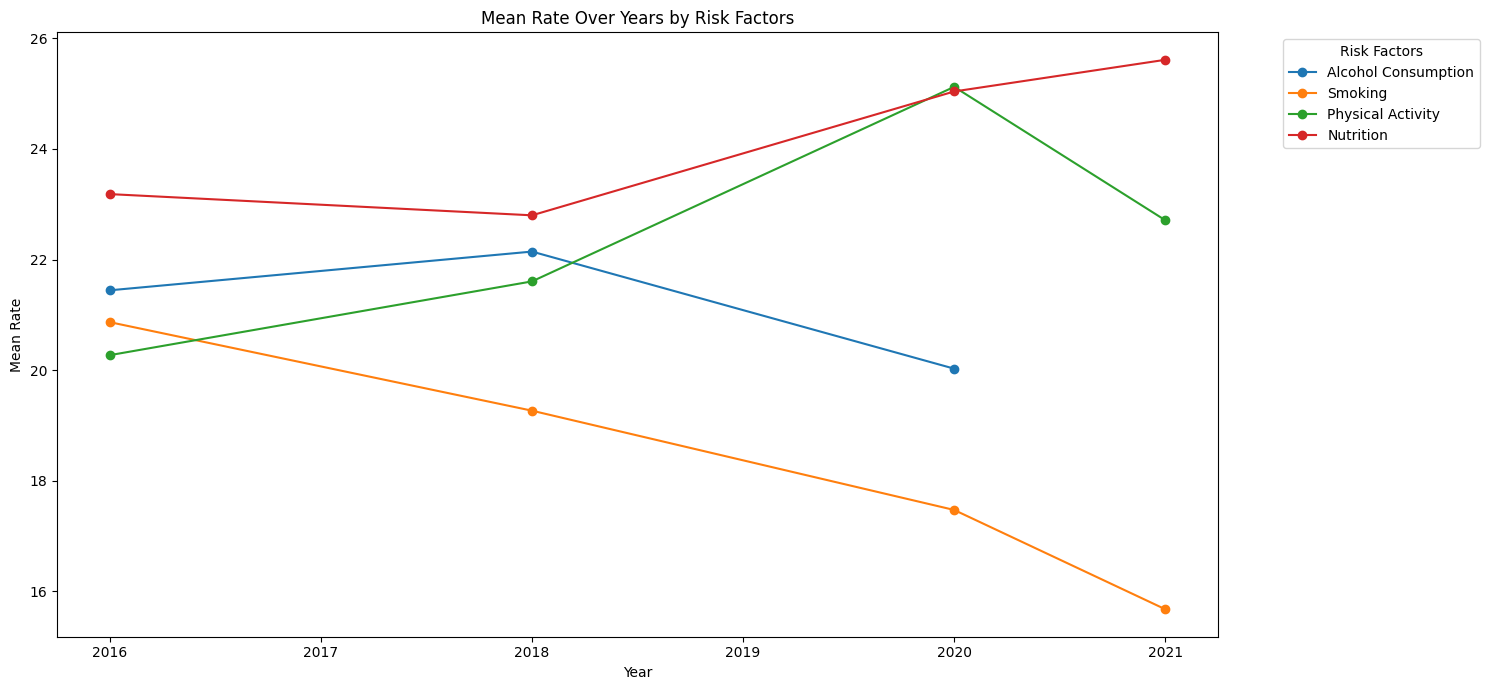

In [58]:
# Plotting the data into a line chart
combined_df.plot(figsize = (15,7) ,marker='o')
plt.title("Mean Rate Over Years by Risk Factors")
plt.xlabel("Year")
plt.ylabel("Mean Rate")
plt.xticks(rotation=0)
plt.legend(title="Risk Factors", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Here you can see, Between 2016 and 2021, key health behaviors exhibited mixed trends. Smoking rates consistently declined, suggesting effective public health interventions. Physical activity levels rose, especially in 2020, possibly reflecting pandemic-induced lifestyle shifts. However, indicators of poor nutrition showed a mild but steady increase. Alcohol consumption fluctuated, though 2021 data is unavailable. These patterns provide essential context for understanding the behavioral drivers behind chronic disease trends.

We have Age Specific Dataset in our original dataset as well. Lets see what age people are prone to these risk factors more.

In [59]:
alcohol_age_specific = alcohol[(alcohol['Measure'] == 'Age-specific rate (0 to 19)') |
                               (alcohol['Measure'] == 'Age-specific rate (20 to 44)') |
                               (alcohol['Measure'] == 'Age-specific rate (45 to 64)') |
                               (alcohol['Measure'] == 'Age-specific rate (65 to 74)') |
                               (alcohol['Measure'] == 'Age-specific rate (75+)')]

In [60]:
Smoking_age_specific = smoking[(smoking['Measure'] == 'Age-specific rate (0 to 19)') |
                               (smoking['Measure'] == 'Age-specific rate (20 to 44)') |
                               (smoking['Measure'] == 'Age-specific rate (45 to 64)') |
                               (smoking['Measure'] == 'Age-specific rate (65 to 74)') |
                               (smoking['Measure'] == 'Age-specific rate (75+)')]

In [61]:
nutrition_age_specific = nutrition[(nutrition['Measure'] == 'Age-specific rate (0 to 19)') |
                               (nutrition['Measure'] == 'Age-specific rate (20 to 44)') |
                               (nutrition['Measure'] == 'Age-specific rate (45 to 64)') |
                               (nutrition['Measure'] == 'Age-specific rate (65 to 74)') |
                               (nutrition['Measure'] == 'Age-specific rate (75+)')]

In [62]:
pa_age_specific = physical_activity[(physical_activity['Measure'] == 'Age-specific rate (0 to 19)') |
                               (physical_activity['Measure'] == 'Age-specific rate (20 to 44)') |
                               (physical_activity['Measure'] == 'Age-specific rate (45 to 64)') |
                               (physical_activity['Measure'] == 'Age-specific rate (65 to 74)') |
                               (physical_activity['Measure'] == 'Age-specific rate (75+)')]

In [63]:
alcohol_mean_age = alcohol_age_specific.groupby('Measure')['Alcohol_Consumption_Rate'].mean()
smoking_mean_age = Smoking_age_specific.groupby('Measure')['Smoking_Rate'].mean()
nutrition_mean_age = nutrition_age_specific.groupby('Measure')['Obesity_Rate'].mean()
PA_mean_age = pa_age_specific.groupby('Measure')['PA_Rate'].mean()

In [64]:
# Combining into a single DataFrame
combined_df_age = pd.DataFrame({
    'Alcohol Consumption': alcohol_mean_age,
    'Smoking': smoking_mean_age,
    'Physical Activity': PA_mean_age,
    'Nutrition': nutrition_mean_age
})

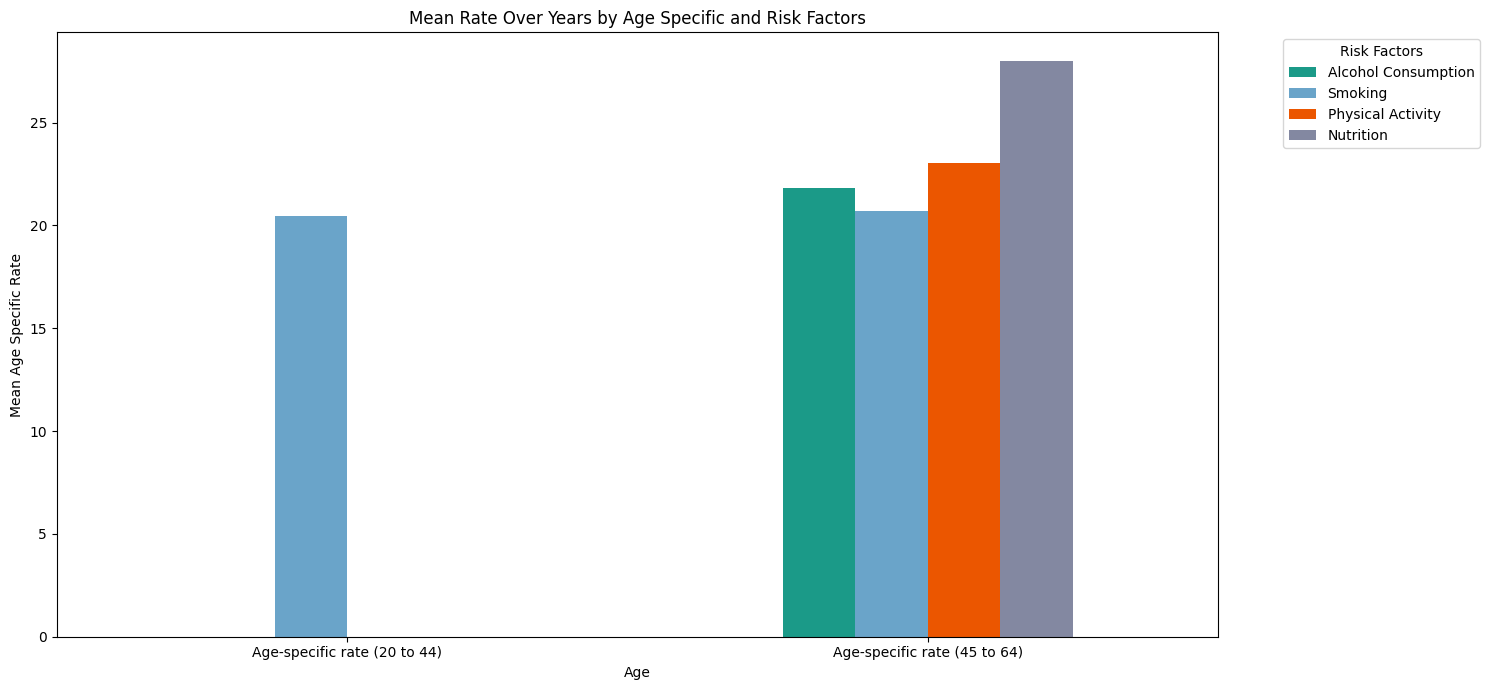

In [65]:
#Ploting the data into a bargraph
combined_df_age.plot(kind = 'bar', figsize = (15,7), color = ('#1b9a88','#6aa4c9','#eb5600','#8388a1'))  # Line plot with markers
plt.title("Mean Rate Over Years by Age Specific and Risk Factors")
plt.xlabel("Age")
plt.ylabel("Mean Age Specific Rate")
plt.xticks(rotation=0)
plt.legend(title="Risk Factors", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Also you can see, Among individuals aged 45 to 64, lifestyle-related risk factors such as alcohol consumption (21.8%), smoking (20.7%), and physical inactivity (23.0%) are notably high. Nutrition-related concerns affect nearly 28% of this group, indicating that middle-aged adults may require targeted behavioral interventions. While only smoking data is available for the 20–44 age group, the similarity in rates (~20.4%) highlights that tobacco use remains a concern across both demographics.

# Statistical Analysis

##Regression Modeling

###Hypertension as a dependent variable

In [66]:
## Dividing data into dependent (Y) and independent variable (X)
X = df[['Alcohol_Consumption_Rate', 'Smoking_Rate', 'Obesity_Rate', 'PA_Rate']]
y = df['Hypertension_Rate']

In [67]:
X = sm.add_constant(X) # Adds Intercept Term
model1 = sm.OLS(y,X).fit()

In [68]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:      Hypertension_Rate   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     4.631
Date:                Thu, 24 Jul 2025   Prob (F-statistic):            0.00393
Time:                        14:30:52   Log-Likelihood:                -366.49
No. Observations:                  42   AIC:                             743.0
Df Residuals:                      37   BIC:                             751.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

the OLS model showed a modest R-squared of 0.334, indicating limited explanatory power. Only smoking and physical activity were statistically significant predictors.

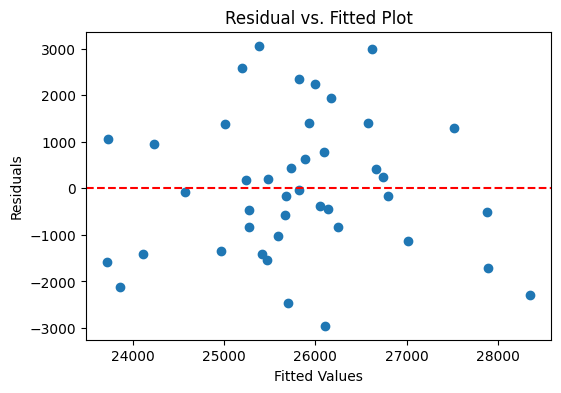

In [69]:
## Creating a Diagnostic Plot # Residual vs. Fitted
residuals = model1.resid
fitted = model1.fittedvalues
plt.figure(figsize=(6, 4))
plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual vs. Fitted Plot')
plt.show()

The residual plot shows clear heteroscedasticity, with residuals scattered unevenly across fitted values—violating key assumptions of linear regression.

COPD as as dependent Variable

In [70]:
## Dividing data into dependent (Y) and independent variable (X)
X = df[['Alcohol_Consumption_Rate', 'Smoking_Rate', 'Obesity_Rate', 'PA_Rate']]
y = df['COPD_Rate']

In [71]:
X = sm.add_constant(X) # Adds Intercept Term
model2 = sm.OLS(y,X).fit()

In [72]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              COPD_Rate   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     49.51
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           2.32e-14
Time:                        14:30:53   Log-Likelihood:                -344.57
No. Observations:                  42   AIC:                             699.1
Df Residuals:                      37   BIC:                             707.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

The COPD model is performing better, with an R-squared of 0.843 and strong significance for alcohol, smoking, and obesity rates.

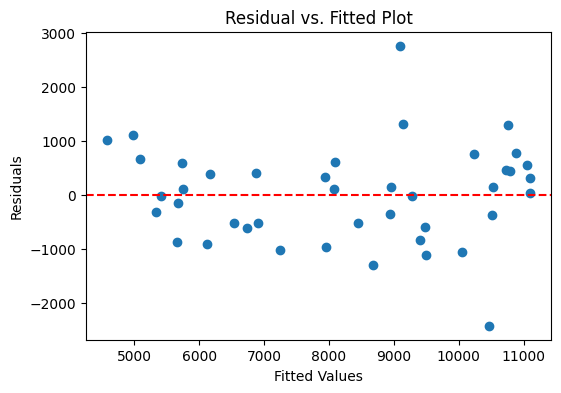

In [73]:
## Creating a Diagnostic Plot # Residual vs. Fitted
residuals = model2.resid
fitted = model2.fittedvalues
plt.figure(figsize=(6, 4))
plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual vs. Fitted Plot')
plt.show()

The residuals still is showing patterns, and the Durbin-Watson statistic suggested possible autocorrelation.


Diabetes as a Dependent Variable

In [74]:
## Dividing data into dependent (Y) and independent variable (X)
X = df[['Alcohol_Consumption_Rate', 'Smoking_Rate', 'Obesity_Rate', 'PA_Rate']]
y = df['Diabetes_Rate']

In [75]:
X = sm.add_constant(X) # Adds Intercept Term
model3 = sm.OLS(y,X).fit()

In [76]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:          Diabetes_Rate   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     5.966
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           0.000827
Time:                        14:30:53   Log-Likelihood:                -355.12
No. Observations:                  42   AIC:                             720.2
Df Residuals:                      37   BIC:                             728.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

For Diabetes, the model has an R-squared of 0.392. Alcohol consumption and physical activity were significant.

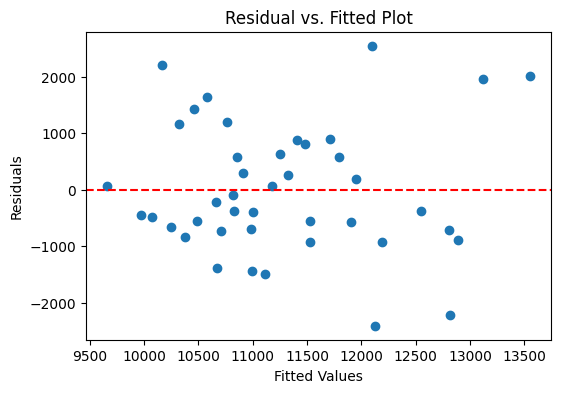

In [77]:
## Creating a Diagnostic Plot # Residual vs. Fitted
residuals = model3.resid
fitted = model3.fittedvalues
plt.figure(figsize=(6, 4))
plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual vs. Fitted Plot')
plt.show()

Here also the residual plot is showing uneven spread and some curvature, indicating potential model misspecification.


Because these issues compromised model reliability, so we are turning to Poisson regression, which is more appropriate for count data like hospitalization events. These models included a log link function and population offset, significantly improving model fit and interpretability.

###GLM Poisson Model

In [78]:
df['log_Hypertension_population'] = np.log(df['Hypertension_Population'])
modelglm1 = sm.GLM(
    df['Hypertension_Count'],
    sm.add_constant(df[['Alcohol_Consumption_Rate', 'Smoking_Rate', 'Obesity_Rate', 'PA_Rate', 'log_Hypertension_population']]),
    family=sm.families.Poisson()
).fit()
print(modelglm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:     Hypertension_Count   No. Observations:                   42
Model:                            GLM   Df Residuals:                       36
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9372.7
Date:                Thu, 24 Jul 2025   Deviance:                       18188.
Time:                        14:30:53   Pearson chi2:                 1.82e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [79]:
df['log_COPD_population'] = np.log(df['COPD_Population'])
modelglm2 = sm.GLM(
    df['COPD_Count'],
    sm.add_constant(df[['Alcohol_Consumption_Rate', 'Smoking_Rate', 'Obesity_Rate', 'PA_Rate', 'log_COPD_population']]),
    family=sm.families.Poisson()
).fit()
print(modelglm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             COPD_Count   No. Observations:                   42
Model:                            GLM   Df Residuals:                       36
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12517.
Date:                Thu, 24 Jul 2025   Deviance:                       24527.
Time:                        14:30:53   Pearson chi2:                 2.45e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [80]:
df['log_diabetes_population'] = np.log(df['Diabetes_Population'])
modelglm3 = sm.GLM(
    df['Diabetes_Count'],
    sm.add_constant(df[['Alcohol_Consumption_Rate', 'Smoking_Rate', 'Obesity_Rate', 'PA_Rate', 'log_diabetes_population']]),
    family=sm.families.Poisson()
).fit()
print(modelglm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         Diabetes_Count   No. Observations:                   42
Model:                            GLM   Df Residuals:                       36
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5971.5
Date:                Thu, 24 Jul 2025   Deviance:                       11421.
Time:                        14:30:53   Pearson chi2:                 1.12e+04
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

The Poisson models for all three diseases had a pseudo R-squared close to 1.000, and all predictors were highly significant. Additionally, the coefficient directions aligned with public health understanding: smoking and obesity increased risk, while physical activity reduced it.

Behavioral factors such as smoking, alcohol consumption, obesity, and physical inactivity showed measurable impacts on disease rates. Notably, smoking and physical inactivity emerged as consistent and significant predictors across all three conditions. Poisson regression models, better suited for count data, revealed stronger explanatory power and more reliable patterns than standard linear regression, with all key predictors being highly significant.